# Analyse de similarité

In [202]:
%matplotlib inline
import numpy as np
from sklearn.covariance import GraphLassoCV, LedoitWolf
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt


def rsa_corr(X,y):
    estimator = LedoitWolf()
    scaler=StandardScaler()
    labels=np.unique(y)
    nf=X.shape[1]
    matrix={}
    cov_matrix_all=np.zeros((len(labels)*nf,len(labels)*nf))
    for i,i_label in enumerate(sorted(labels)):
        matrix[i]={}
        for j,j_label in enumerate(sorted(labels)):
            X_cond=X[np.logical_or(y==i_label,y==j_label)]           
            X_cond_scale=scaler.fit_transform(X_cond)   
            estimator.fit(X_cond_scale)
            matrix[i][j]=estimator.covariance_   
            ni=i*nf
            nj=j*nf
            cov_matrix_all[ni:ni+nf,nj:nj+nf]=estimator.covariance_
    return cov_matrix_all,matrix
    #matrix_0=np.hstack((matrix[0][0],matrix[0][1],matrix[0][2],matrix[0][3]))
    #matrix_1=np.hstack((matrix[1][0],matrix[1][1],matrix[1][2],matrix[1][3]))
    #matrix_2=np.hstack((matrix[2][0],matrix[2][1],matrix[2][2],matrix[2][3]))
    #matrix_3=np.hstack((matrix[3][0],matrix[3][1],matrix[3][2],matrix[3][3]))
    #matrix_final=np.vstack((matrix_0,matrix_1,matrix_2,matrix_3))

def bounds_to_loc(bounds):
    bounds_titles = bounds
    bounds_titles = np.hstack([0,bounds_titles])
    network_titles_pl = np.zeros_like(bounds_titles)
    for k in range(0,bounds_titles.shape[0]-1):
        network_titles_pl[k] = 0.5*(bounds_titles[k+1] + bounds_titles[k] ) 
    network_titles_pl = network_titles_pl[:-1]
    return network_titles_pl

def plot_matrices(matrix,y,vmax,vmin):
    label=sorted(np.unique(y))
    nf=int(matrix.shape[0]/len(label))
    
    plt.imshow(matrix, vmin=vmin, vmax=vmax, cmap='RdBu_r',
                   interpolation='nearest')
    bounds=nf-0.5
    for l in range(len(label)-1):
        bounds=np.hstack([bounds,nf*(2+l)-0.5])
    locs=bounds_to_loc(bounds)
    fontsize=14
    plt.xticks([])
    plt.xticks(locs,label,rotation=40)
    plt.yticks([])
    plt.yticks(locs,label,)
    #plt.tight_layout()
    plt.title(n)
    plt.colorbar()
    for b in bounds:
        plt.axhline(b,color='k')
        plt.axvline(b,color='k')
    plt.show()


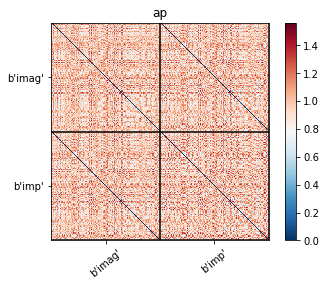

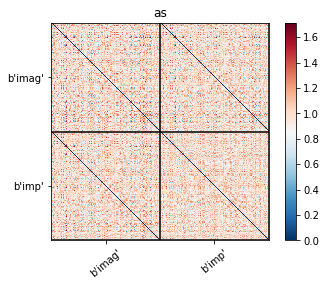

In [205]:
fold='F:/IRM_marche/all_mni_imp_imag/'
smt='ss'       
names=('ap','as','bh','bi','boh','cmp','cas','cs','cb','gm','gn','gbn','mv',
       'ms','pm','pc','ph','pa','pv','pom','rdc','ti','vs',
       'an','bm','cc','ci','cjf','dm','fb','fm','gem','gmc','hnc','lm','mac',
       'marc','marm','om','pic','pr','qs','ris','sn','tj','va',
       'af','ba','be','br','ds','ea','fj','gc','gv','hc','hn',
       'lbc','lc','lp','my','mc','pj','pf','rs','wl',#'dc',     
      )
names=('ap','as')
label=np.loadtxt(fold+'label.txt','S12')
mask=np.logical_or(label==b'imp',label==b'imag')
label=label[mask]
for i,n in enumerate(sorted(names)):
    roi_name=fold+'asymroi_'+smt+'_'+n+'.npz'              
    roi=np.load(roi_name)['roi'][mask]
    matrix,matrices=rsa_corr(roi,label)
    vmax = np.max(np.abs(matrix))
    #plot_matrices(matrix,label,vmax=vmax,vmin=-vmax)
    dis=1-matrix
    vmax = np.max(dis)
    vmin = np.min(dis)
    plot_matrices(dis,label,vmax=vmax,vmin=vmin)


## MDS


In [206]:
from sklearn.manifold import MDS
mds = MDS(2, random_state=0, dissimilarity='precomputed')
summary = mds.fit_transform(dis)

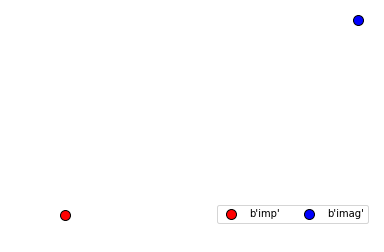

In [208]:
cmap = plt.get_cmap('rainbow')
colors = ['r', 'b']
names = np.unique(label)
for color, name in zip(colors, set(names)):
    sel = np.where([this_name == name for this_name in names])[0]
    size = 500 if name == 'human face' else 100
    plt.scatter(summary[sel, 0], summary[sel, 1], s=size,
               facecolors=color, label=name, edgecolors='k')
plt.axis('off')
plt.legend(loc='lower right', scatterpoints=1, ncol=2)
plt.show()

In [210]:
summary.shape

(888, 2)